In [1]:
import sklearn as sk
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.callbacks import EarlyStopping
from keras.losses import mean_squared_error
from keras import backend as K


Using TensorFlow backend.


In [3]:
from keras.layers import ReLU
from keras.layers import LeakyReLU
from keras.optimizers import Adam

In [4]:
X = pd.read_csv('~/Datas/KaggleHouse/X_train_V2.csv',header=None).to_numpy()
y = pd.read_csv('~/Datas/KaggleHouse/Y_train_V2_Nolog.csv',header=None).to_numpy()
X_final = pd.read_csv('~/Datas/KaggleHouse/X_test_V2.csv',header=None).to_numpy()
Id = pd.read_csv('~/Datas/KaggleHouse/Id.csv',header=None,names=['Id'])
X.shape

(1456, 405)

In [5]:
IN_DIM = X.shape[1]
TRAIN_LEN = X.shape[0]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True)

In [6]:
def plotHistory(history):
    import matplotlib.pyplot as plt
    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

In [7]:
def pred(model):
    return model.predict(X_final)

In [8]:
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 

In [9]:
def root_mean_square_expd_error(y_true, y_pred):
    return K.sqrt(K.mean(K.square(K.exp(y_pred)-K.exp(y_true))))

In [88]:
# y_org = pd.read_csv('~/Datas/KaggleHouse/Y_train_V2_Nolog.csv',header=None).to_numpy()
# y_log = pd.read_csv('~/Datas/KaggleHouse/Y_train_V2.csv',header=None).to_numpy()
# arr = y_log[100]
# K.exp(arr),np.exp(arr),y_org[100]

In [89]:
NN_500E_Adam = Sequential()
NN_500E_Adam.add(Dense(512,input_dim = IN_DIM))
NN_500E_Adam.add(ReLU())
NN_500E_Adam.add(Dense(512))
NN_500E_Adam.add(ReLU())
NN_500E_Adam.add(Dense(512))
NN_500E_Adam.add(ReLU())
NN_500E_Adam.add(Dense(1))
NN_500E_Adam.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 512)               207872    
_________________________________________________________________
re_lu_13 (ReLU)              (None, 512)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 512)               262656    
_________________________________________________________________
re_lu_14 (ReLU)              (None, 512)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 512)               262656    
_________________________________________________________________
re_lu_15 (ReLU)              (None, 512)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 1)                

In [91]:
es = EarlyStopping(monitor='val_loss', patience = 50, mode='min', restore_best_weights=True, verbose=1)
NN_500E_Adam.compile(loss=root_mean_squared_error, optimizer='adam')
history = NN_500E_Adam.fit(x=X,y=y,batch_size=TRAIN_LEN,epochs=500,validation_split=0.3,callbacks=[es])

Train on 1019 samples, validate on 437 samples
Epoch 1/500
1019/1019 [==============================] - 0s 131us/step - loss: nan - val_loss: nan
Epoch 2/500
1019/1019 [==============================] - 0s 22us/step - loss: nan - val_loss: nan
Epoch 3/500
1019/1019 [==============================] - 0s 22us/step - loss: nan - val_loss: nan
Epoch 4/500
1019/1019 [==============================] - 0s 21us/step - loss: nan - val_loss: nan
Epoch 5/500
1019/1019 [==============================] - 0s 22us/step - loss: nan - val_loss: nan
Epoch 6/500
1019/1019 [==============================] - 0s 21us/step - loss: nan - val_loss: nan
Epoch 7/500
1019/1019 [==============================] - 0s 21us/step - loss: nan - val_loss: nan
Epoch 8/500
1019/1019 [==============================] - 0s 21us/step - loss: nan - val_loss: nan
Epoch 9/500
1019/1019 [==============================] - 0s 21us/step - loss: nan - val_loss: nan
Epoch 10/500
1019/1019 [==============================] - 0s 22us/step

TypeError: 'NoneType' object is not subscriptable

In [ ]:
# NN_500E_Adam.save('/home/louisliu2096/Models/KaggleHouse/NN_500E_Adam_V2_Es.h5')
plt = plotHistory(history)
plt

In [78]:
NN_500E_NewAdam = Sequential()
NN_500E_NewAdam.add(Dense(512,input_dim = IN_DIM,activation = 'relu'))
NN_500E_NewAdam.add(Dense(512,activation = 'relu'))
NN_500E_NewAdam.add(Dense(512,activation = 'relu'))
NN_500E_NewAdam.add(Dense(1))

In [79]:
from keras.optimizers import Adam
newAdam = Adam(learning_rate=0.0005)
NN_500E_NewAdam.compile(loss=root_mean_squared_error, optimizer=newAdam)
history = NN_500E_NewAdam.fit(x=X,y=y,epochs=500,validation_split=0.2)

Train on 1164 samples, validate on 292 samples
Epoch 1/500
1164/1164 [==============================] - 0s 300us/step - loss: 148543.6407 - val_loss: 92017.5689
Epoch 2/500
1164/1164 [==============================] - 0s 169us/step - loss: 95069.6305 - val_loss: 63413.2130
Epoch 3/500
1164/1164 [==============================] - 0s 165us/step - loss: 65197.5775 - val_loss: 50614.4189
Epoch 4/500
1164/1164 [==============================] - 0s 163us/step - loss: 49147.6446 - val_loss: 45944.5010
Epoch 5/500
1164/1164 [==============================] - 0s 161us/step - loss: 45520.8952 - val_loss: 43939.2352
Epoch 6/500
1164/1164 [==============================] - 0s 163us/step - loss: 42889.4300 - val_loss: 42513.9320
Epoch 7/500
1164/1164 [==============================] - 0s 162us/step - loss: 41225.1446 - val_loss: 41413.3865
Epoch 8/500
1164/1164 [==============================] - 0s 164us/step - loss: 40358.3156 - val_loss: 40452.0210
Epoch 9/500
1164/1164 [=========================

1164/1164 [==============================] - 0s 173us/step - loss: 30300.9578 - val_loss: 37120.4281
Epoch 144/500
1164/1164 [==============================] - 0s 174us/step - loss: 28803.7107 - val_loss: 39837.7526
Epoch 145/500
1164/1164 [==============================] - 0s 175us/step - loss: 29633.7259 - val_loss: 37700.4394
Epoch 146/500
1164/1164 [==============================] - 0s 177us/step - loss: 28818.7375 - val_loss: 37649.8676
Epoch 147/500
1164/1164 [==============================] - 0s 178us/step - loss: 28790.7979 - val_loss: 37344.8975
Epoch 148/500
1164/1164 [==============================] - 0s 173us/step - loss: 29145.6958 - val_loss: 37731.7047
Epoch 149/500
1164/1164 [==============================] - 0s 175us/step - loss: 30112.2863 - val_loss: 37618.3568
Epoch 150/500
1164/1164 [==============================] - 0s 175us/step - loss: 28796.9386 - val_loss: 38545.3280
Epoch 151/500
1164/1164 [==============================] - 0s 174us/step - loss: 28313.8811 - 

1164/1164 [==============================] - 0s 160us/step - loss: 19223.7877 - val_loss: 38843.5109
Epoch 286/500
1164/1164 [==============================] - 0s 161us/step - loss: 18868.5739 - val_loss: 37600.3272
Epoch 287/500
1164/1164 [==============================] - 0s 161us/step - loss: 18485.2802 - val_loss: 38107.1495
Epoch 288/500
1164/1164 [==============================] - 0s 159us/step - loss: 18463.5082 - val_loss: 40261.4744
Epoch 289/500
1164/1164 [==============================] - 0s 160us/step - loss: 19218.3906 - val_loss: 40034.7559
Epoch 290/500
1164/1164 [==============================] - 0s 160us/step - loss: 19275.4340 - val_loss: 38474.6564
Epoch 291/500
1164/1164 [==============================] - 0s 158us/step - loss: 18869.3455 - val_loss: 37746.1772
Epoch 292/500
1164/1164 [==============================] - 0s 160us/step - loss: 20223.0720 - val_loss: 37732.5231
Epoch 293/500
1164/1164 [==============================] - 0s 158us/step - loss: 20127.6555 - 

1164/1164 [==============================] - 0s 158us/step - loss: 14523.6876 - val_loss: 43397.1966
Epoch 428/500
1164/1164 [==============================] - 0s 160us/step - loss: 13716.2277 - val_loss: 41724.9843
Epoch 429/500
1164/1164 [==============================] - 0s 160us/step - loss: 13037.9280 - val_loss: 40554.8354
Epoch 430/500
1164/1164 [==============================] - 0s 160us/step - loss: 13784.9459 - val_loss: 40448.4096
Epoch 431/500
1164/1164 [==============================] - 0s 161us/step - loss: 13848.4145 - val_loss: 42653.8635
Epoch 432/500
1164/1164 [==============================] - 0s 161us/step - loss: 13699.0293 - val_loss: 40299.0116
Epoch 433/500
1164/1164 [==============================] - 0s 159us/step - loss: 12071.9218 - val_loss: 40882.2461
Epoch 434/500
1164/1164 [==============================] - 0s 161us/step - loss: 13329.4149 - val_loss: 40500.4345
Epoch 435/500
1164/1164 [==============================] - 0s 163us/step - loss: 13399.1613 - 

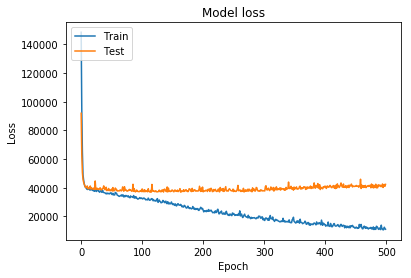

In [80]:
plt = plotHistory(history)
plt

In [110]:
NN_500E_NewAdam.save('NN_5000E_NewAdam_V2.h5')

In [21]:
NN_5000E_Adam_Sig = Sequential()
NN_5000E_Adam_Sig.add(Dense(512,input_dim = 330,activation = 'sigmoid'))
NN_5000E_Adam_Sig.add(Dense(512,activation = 'sigmoid'))
NN_5000E_Adam_Sig.add(Dense(512,activation = 'sigmoid'))
NN_5000E_Adam_Sig.add(Dense(1))
NN_5000E_Adam_Sig.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               169472    
_________________________________________________________________
dense_6 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 695,297
Trainable params: 695,297
Non-trainable params: 0
_________________________________________________________________


In [24]:
newAdam = Adam(learning_rate=0.0005)
NN_5000E_Adam_Sig.compile(loss=root_mean_squared_error, optimizer=newAdam)
history = NN_5000E_Adam_Sig.fit(x=X,y=y,epochs=500,validation_split=0.2)

Train on 1167 samples, validate on 292 samples
Epoch 1/500
1167/1167 [==============================] - 0s 364us/step - loss: 37765465534.6290 - val_loss: 38856311962.3014
Epoch 2/500
1167/1167 [==============================] - 0s 253us/step - loss: 37760839083.3248 - val_loss: 38851632927.5616
Epoch 3/500
1167/1167 [==============================] - 0s 249us/step - loss: 37756176252.3805 - val_loss: 38846826748.4931
Epoch 4/500
1167/1167 [==============================] - 0s 253us/step - loss: 37751193261.2991 - val_loss: 38841367622.1370
Epoch 5/500
1167/1167 [==============================] - 0s 248us/step - loss: 37745548971.5441 - val_loss: 38835620204.7123
Epoch 6/500
1167/1167 [==============================] - 0s 239us/step - loss: 37739652777.7892 - val_loss: 38829458361.8630
Epoch 7/500
1167/1167 [==============================] - 0s 245us/step - loss: 37733663901.0660 - val_loss: 38823570894.9041
Epoch 8/500
1167/1167 [==============================] - 0s 249us/step - loss:

Epoch 66/500
1167/1167 [==============================] - 0s 254us/step - loss: 37420806614.3205 - val_loss: 38508010622.2466
Epoch 67/500
1167/1167 [==============================] - 0s 254us/step - loss: 37415536322.3582 - val_loss: 38502743671.2329
Epoch 68/500
1167/1167 [==============================] - 0s 237us/step - loss: 37410309570.1388 - val_loss: 38497450797.5890
Epoch 69/500
1167/1167 [==============================] - 0s 240us/step - loss: 37405076672.1645 - val_loss: 38492161066.0822
Epoch 70/500
1167/1167 [==============================] - 0s 248us/step - loss: 37399840706.5776 - val_loss: 38486900736.0000
Epoch 71/500
1167/1167 [==============================] - 0s 245us/step - loss: 37394613480.5278 - val_loss: 38481583735.2329
Epoch 72/500
1167/1167 [==============================] - 0s 240us/step - loss: 37389368189.2579 - val_loss: 38476314427.6164
Epoch 73/500
1167/1167 [==============================] - 0s 244us/step - loss: 37384131820.0377 - val_loss: 384710265

Epoch 131/500
1167/1167 [==============================] - 0s 247us/step - loss: 37081676500.7849 - val_loss: 38165743924.6027
Epoch 132/500
1167/1167 [==============================] - 0s 253us/step - loss: 37076492333.6281 - val_loss: 38160474673.0959
Epoch 133/500
1167/1167 [==============================] - 0s 244us/step - loss: 37071288535.8560 - val_loss: 38155209068.7123
Epoch 134/500
1167/1167 [==============================] - 0s 237us/step - loss: 37066082467.2082 - val_loss: 38149985097.6438
Epoch 135/500
1167/1167 [==============================] - 0s 259us/step - loss: 37060892203.4344 - val_loss: 38144735708.9315
Epoch 136/500
1167/1167 [==============================] - 0s 254us/step - loss: 37055698521.0626 - val_loss: 38139490808.9863
Epoch 137/500
1167/1167 [==============================] - 0s 240us/step - loss: 37050510521.1448 - val_loss: 38134242766.9041
Epoch 138/500
1167/1167 [==============================] - 0s 244us/step - loss: 37045310631.5955 - val_loss: 3

1167/1167 [==============================] - 0s 247us/step - loss: 36419954521.2819 - val_loss: 37497654173.8082
Epoch 260/500
1167/1167 [==============================] - 0s 248us/step - loss: 36414807691.9554 - val_loss: 37492467964.4931
Epoch 261/500
1167/1167 [==============================] - 0s 243us/step - loss: 36409664979.6881 - val_loss: 37487280240.2192
Epoch 262/500
1167/1167 [==============================] - 0s 247us/step - loss: 36404526596.8260 - val_loss: 37482079274.0822
Epoch 263/500
1167/1167 [==============================] - 0s 247us/step - loss: 36399381996.2571 - val_loss: 37476889922.6301
Epoch 264/500
1167/1167 [==============================] - 0s 247us/step - loss: 36394242837.7172 - val_loss: 37471721556.1644
Epoch 265/500
1167/1167 [==============================] - 0s 245us/step - loss: 36389099426.9889 - val_loss: 37466531755.8356
Epoch 266/500
1167/1167 [==============================] - 0s 243us/step - loss: 36383964840.0343 - val_loss: 37461280178.849

1167/1167 [==============================] - 0s 251us/step - loss: 35765347483.3111 - val_loss: 36836729617.5342
Epoch 388/500
1167/1167 [==============================] - 0s 251us/step - loss: 35760273351.8423 - val_loss: 36831582572.7123
Epoch 389/500
1167/1167 [==============================] - 0s 241us/step - loss: 35755194403.0985 - val_loss: 36826471101.3699
Epoch 390/500
1167/1167 [==============================] - 0s 255us/step - loss: 35750124121.9400 - val_loss: 36821362547.7260
Epoch 391/500
1167/1167 [==============================] - 0s 250us/step - loss: 35745035900.1611 - val_loss: 36816217578.9589
Epoch 392/500
1167/1167 [==============================] - 0s 243us/step - loss: 35739942648.7609 - val_loss: 36811075527.8904
Epoch 393/500
1167/1167 [==============================] - 0s 245us/step - loss: 35734834733.1894 - val_loss: 36805947392.0000
Epoch 394/500
1167/1167 [==============================] - 0s 252us/step - loss: 35729741021.9983 - val_loss: 36800814711.232

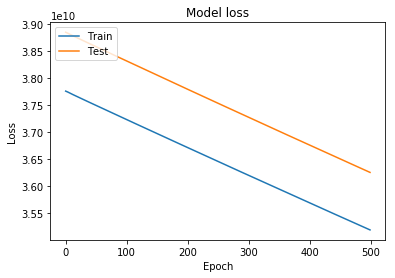

In [25]:
plt = plotHistory(history)
plt

In [27]:
NN_5000E_Adam_4H = Sequential()
NN_5000E_Adam_4H.add(Dense(512,input_dim = 330,activation = 'relu'))
NN_5000E_Adam_4H.add(Dense(512,activation = 'relu'))
NN_5000E_Adam_4H.add(Dense(512,activation = 'relu'))
NN_5000E_Adam_4H.add(Dense(512,activation = 'relu'))
NN_5000E_Adam_4H.add(Dense(512,activation = 'relu'))
NN_5000E_Adam_4H.add(Dense(1))
NN_5000E_Adam_4H.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 512)               169472    
_________________________________________________________________
dense_16 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_17 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_18 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_19 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 513       
Total params: 1,220,609
Trainable params: 1,220,609
Non-trainable params: 0
____________________________________________

In [30]:
newAdam = Adam(learning_rate=0.0001)
NN_5000E_Adam_4H.compile(loss='mean_squared_error', optimizer=newAdam)
history = NN_5000E_Adam_4H.fit(x=X,y=y,epochs=500,validation_split=0.2)

Train on 1167 samples, validate on 292 samples
Epoch 1/500
1167/1167 [==============================] - 1s 564us/step - loss: 36522277088.6307 - val_loss: 31151011924.1644
Epoch 2/500
1167/1167 [==============================] - 0s 427us/step - loss: 20591323523.4002 - val_loss: 10548069663.5616
Epoch 3/500
1167/1167 [==============================] - 0s 427us/step - loss: 14787735020.2571 - val_loss: 9263632727.6712
Epoch 4/500
1167/1167 [==============================] - 1s 437us/step - loss: 12293208674.7147 - val_loss: 7920128925.8082
Epoch 5/500
1167/1167 [==============================] - 1s 435us/step - loss: 9516187921.4396 - val_loss: 5965733312.8767
Epoch 6/500
1167/1167 [==============================] - 1s 437us/step - loss: 6733085789.2853 - val_loss: 4627476713.2055
Epoch 7/500
1167/1167 [==============================] - 1s 443us/step - loss: 4693404259.3728 - val_loss: 4056714520.5479
Epoch 8/500
1167/1167 [==============================] - 1s 431us/step - loss: 3240308

Epoch 132/500
1167/1167 [==============================] - 0s 427us/step - loss: 1228621927.9246 - val_loss: 2713756279.2329
Epoch 133/500
1167/1167 [==============================] - 0s 410us/step - loss: 1170014581.2511 - val_loss: 2879766373.6986
Epoch 134/500
1167/1167 [==============================] - 1s 429us/step - loss: 1151639312.4524 - val_loss: 2739778556.4932
Epoch 135/500
1167/1167 [==============================] - 1s 431us/step - loss: 1161729214.9032 - val_loss: 2823046936.5479
Epoch 136/500
1167/1167 [==============================] - 0s 426us/step - loss: 1136940189.0660 - val_loss: 2735173772.2740
Epoch 137/500
1167/1167 [==============================] - 0s 425us/step - loss: 1374524349.3402 - val_loss: 2740995797.9178
Epoch 138/500
1167/1167 [==============================] - 1s 432us/step - loss: 1256290006.7592 - val_loss: 2676047721.2055
Epoch 139/500
1167/1167 [==============================] - 0s 422us/step - loss: 1219013163.5441 - val_loss: 3056892068.8219


1167/1167 [==============================] - 0s 426us/step - loss: 809903481.3093 - val_loss: 2481664671.5616
Epoch 264/500
1167/1167 [==============================] - 1s 433us/step - loss: 817842361.8578 - val_loss: 2401059868.0548
Epoch 265/500
1167/1167 [==============================] - 1s 430us/step - loss: 827466964.1542 - val_loss: 2538248945.9726
Epoch 266/500
1167/1167 [==============================] - 1s 430us/step - loss: 820705424.0686 - val_loss: 2347676878.9041
Epoch 267/500
1167/1167 [==============================] - 1s 434us/step - loss: 825997942.4850 - val_loss: 2434173759.1233
Epoch 268/500
1167/1167 [==============================] - 0s 427us/step - loss: 895748078.3959 - val_loss: 2428477632.8767
Epoch 269/500
1167/1167 [==============================] - 1s 436us/step - loss: 822585974.5124 - val_loss: 2452980557.1507
Epoch 270/500
1167/1167 [==============================] - 1s 442us/step - loss: 801043098.4884 - val_loss: 2391332821.9178
Epoch 271/500
1167/116

1167/1167 [==============================] - 0s 419us/step - loss: 637857781.4156 - val_loss: 2214793082.7397
Epoch 396/500
1167/1167 [==============================] - 1s 439us/step - loss: 583126219.6264 - val_loss: 2182806457.8630
Epoch 397/500
1167/1167 [==============================] - 0s 423us/step - loss: 628089033.9263 - val_loss: 2403850236.4932
Epoch 398/500
1167/1167 [==============================] - 1s 441us/step - loss: 599288422.6358 - val_loss: 2366905063.4521
Epoch 399/500
1167/1167 [==============================] - 0s 428us/step - loss: 626103832.1302 - val_loss: 2407291341.1507
Epoch 400/500
1167/1167 [==============================] - 0s 424us/step - loss: 570548071.0746 - val_loss: 2214153749.0411
Epoch 401/500
1167/1167 [==============================] - 1s 433us/step - loss: 600729730.2211 - val_loss: 2782370617.8630
Epoch 402/500
1167/1167 [==============================] - 1s 439us/step - loss: 616668776.5553 - val_loss: 2386182559.5616
Epoch 403/500
1167/116

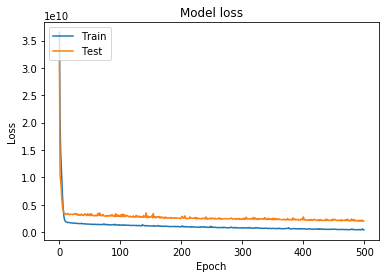

In [31]:
plt = plotHistory(history)
plt

In [34]:
NN_5000E_Adam_32 = Sequential()
NN_5000E_Adam_32.add(Dense(32,input_dim = 330,activation = 'relu'))
NN_5000E_Adam_32.add(Dense(32,activation = 'relu'))
NN_5000E_Adam_32.add(Dense(32,activation = 'relu'))
NN_5000E_Adam_32.add(Dense(1))
NN_5000E_Adam_32.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 32)                10592     
_________________________________________________________________
dense_22 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_23 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 33        
Total params: 12,737
Trainable params: 12,737
Non-trainable params: 0
_________________________________________________________________


In [35]:
newAdam = Adam(learning_rate=0.0001)
NN_5000E_Adam_32.compile(loss='mean_squared_error', optimizer=newAdam)
history = NN_5000E_Adam_32.fit(x=X,y=y,epochs=500,validation_split=0.2)

Train on 1167 samples, validate on 292 samples
Epoch 1/500
1167/1167 [==============================] - 0s 173us/step - loss: 38706398633.5698 - val_loss: 39777723770.7397
Epoch 2/500
1167/1167 [==============================] - 0s 59us/step - loss: 38636421785.1174 - val_loss: 39698240722.4110
Epoch 3/500
1167/1167 [==============================] - 0s 60us/step - loss: 38542318570.0634 - val_loss: 39589462240.4384
Epoch 4/500
1167/1167 [==============================] - 0s 59us/step - loss: 38415337147.3385 - val_loss: 39443433948.9315
Epoch 5/500
1167/1167 [==============================] - 0s 58us/step - loss: 38248806998.4302 - val_loss: 39249987275.3973
Epoch 6/500
1167/1167 [==============================] - 0s 59us/step - loss: 38010765052.2708 - val_loss: 38963096646.1370
Epoch 7/500
1167/1167 [==============================] - 0s 62us/step - loss: 37672731139.9486 - val_loss: 38570601149.3699
Epoch 8/500
1167/1167 [==============================] - 0s 60us/step - loss: 372209

Epoch 67/500
1167/1167 [==============================] - 0s 60us/step - loss: 6317624499.0026 - val_loss: 5556530887.8904
Epoch 68/500
1167/1167 [==============================] - 0s 59us/step - loss: 6214892520.7472 - val_loss: 5502116827.1781
Epoch 69/500
1167/1167 [==============================] - 0s 58us/step - loss: 6116913004.8055 - val_loss: 5452863030.3562
Epoch 70/500
1167/1167 [==============================] - 0s 60us/step - loss: 6025396548.6615 - val_loss: 5398700131.9452
Epoch 71/500
1167/1167 [==============================] - 0s 58us/step - loss: 5953267253.3059 - val_loss: 5374689651.7260
Epoch 72/500
1167/1167 [==============================] - 0s 57us/step - loss: 5810141920.4113 - val_loss: 5317422718.2466
Epoch 73/500
1167/1167 [==============================] - 0s 57us/step - loss: 5734094331.1740 - val_loss: 5277504990.6849
Epoch 74/500
1167/1167 [==============================] - 0s 59us/step - loss: 5636116918.2931 - val_loss: 5215588639.5616
Epoch 75/500
116

Epoch 199/500
1167/1167 [==============================] - 0s 61us/step - loss: 1642946155.7635 - val_loss: 3378011390.2466
Epoch 200/500
1167/1167 [==============================] - 0s 57us/step - loss: 1643436666.3239 - val_loss: 3388817851.6164
Epoch 201/500
1167/1167 [==============================] - 0s 59us/step - loss: 1641126022.1422 - val_loss: 3370086361.4247
Epoch 202/500
1167/1167 [==============================] - 0s 60us/step - loss: 1640486235.0368 - val_loss: 3368569985.7534
Epoch 203/500
1167/1167 [==============================] - 0s 57us/step - loss: 1640567324.9015 - val_loss: 3365025458.8493
Epoch 204/500
1167/1167 [==============================] - 0s 56us/step - loss: 1636792076.9152 - val_loss: 3356467892.6027
Epoch 205/500
1167/1167 [==============================] - 0s 55us/step - loss: 1633960917.0043 - val_loss: 3374617394.8493
Epoch 206/500
1167/1167 [==============================] - 0s 55us/step - loss: 1637340350.7798 - val_loss: 3348085214.6849
Epoch 20

1167/1167 [==============================] - 0s 60us/step - loss: 1570279104.1097 - val_loss: 3324334576.2192
Epoch 266/500
1167/1167 [==============================] - 0s 58us/step - loss: 1568328393.8166 - val_loss: 3333199596.7123
Epoch 267/500
1167/1167 [==============================] - 0s 57us/step - loss: 1569793750.1560 - val_loss: 3337802536.3288
Epoch 268/500
1167/1167 [==============================] - 0s 59us/step - loss: 1566240392.4456 - val_loss: 3336586560.8767
Epoch 269/500
1167/1167 [==============================] - 0s 59us/step - loss: 1568994391.8423 - val_loss: 3313692328.3288
Epoch 270/500
1167/1167 [==============================] - 0s 59us/step - loss: 1567468620.2296 - val_loss: 3312366188.7123
Epoch 271/500
1167/1167 [==============================] - 0s 59us/step - loss: 1564970378.9683 - val_loss: 3312891207.8904
Epoch 272/500
1167/1167 [==============================] - 0s 60us/step - loss: 1566892999.8423 - val_loss: 3317635817.2055
Epoch 273/500
1167/116

1167/1167 [==============================] - 0s 58us/step - loss: 1486969053.2305 - val_loss: 3231215961.4247
Epoch 398/500
1167/1167 [==============================] - 0s 58us/step - loss: 1485900301.8201 - val_loss: 3240620473.8630
Epoch 399/500
1167/1167 [==============================] - 0s 59us/step - loss: 1490707363.6470 - val_loss: 3247976372.6027
Epoch 400/500
1167/1167 [==============================] - 0s 57us/step - loss: 1488909484.6410 - val_loss: 3274217538.6301
Epoch 401/500
1167/1167 [==============================] - 0s 61us/step - loss: 1495862845.0934 - val_loss: 3234048885.4795
Epoch 402/500
1167/1167 [==============================] - 0s 60us/step - loss: 1485780904.8569 - val_loss: 3238229065.6438
Epoch 403/500
1167/1167 [==============================] - 0s 59us/step - loss: 1487108986.9546 - val_loss: 3245870991.7808
Epoch 404/500
1167/1167 [==============================] - 0s 59us/step - loss: 1490039268.5793 - val_loss: 3216480452.3836
Epoch 405/500
1167/116

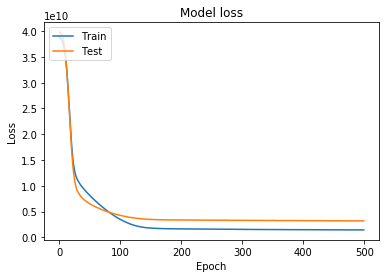

In [36]:
plt = plotHistory(history)
plt

In [40]:
NN_5000E_Adam_128 = Sequential()
NN_5000E_Adam_128.add(Dense(128,input_dim = 330,activation = 'relu'))
NN_5000E_Adam_128.add(Dense(128,activation = 'relu'))
NN_5000E_Adam_128.add(Dense(128,activation = 'relu'))
NN_5000E_Adam_128.add(Dense(1))
NN_5000E_Adam_128.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 128)               42368     
_________________________________________________________________
dense_26 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_27 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 129       
Total params: 75,521
Trainable params: 75,521
Non-trainable params: 0
_________________________________________________________________


In [41]:
newAdam = Adam(learning_rate=0.0001)
NN_5000E_Adam_128.compile(loss='mean_squared_error', optimizer=newAdam)
history = NN_5000E_Adam_128.fit(x=X,y=y,epochs=500,validation_split=0.2)

Train on 1167 samples, validate on 292 samples
Epoch 1/500
1167/1167 [==============================] - 0s 187us/step - loss: 38690821717.5527 - val_loss: 39492075295.5616
Epoch 2/500
1167/1167 [==============================] - 0s 81us/step - loss: 38067167105.6452 - val_loss: 38787898438.1370
Epoch 3/500
1167/1167 [==============================] - 0s 82us/step - loss: 37190807258.9272 - val_loss: 37712415982.4658
Epoch 4/500
1167/1167 [==============================] - 0s 82us/step - loss: 35843968595.7978 - val_loss: 36016919930.7397
Epoch 5/500
1167/1167 [==============================] - 0s 78us/step - loss: 33685374161.7138 - val_loss: 33240283023.7808
Epoch 6/500
1167/1167 [==============================] - 0s 80us/step - loss: 30315134535.5133 - val_loss: 29067547633.9726
Epoch 7/500
1167/1167 [==============================] - 0s 77us/step - loss: 25726978767.5201 - val_loss: 23658073130.0822
Epoch 8/500
1167/1167 [==============================] - 0s 77us/step - loss: 206877

1167/1167 [==============================] - 0s 77us/step - loss: 1765073418.6941 - val_loss: 3411879232.8767
Epoch 68/500
1167/1167 [==============================] - 0s 76us/step - loss: 1758582463.3967 - val_loss: 3396047347.7260
Epoch 69/500
1167/1167 [==============================] - 0s 75us/step - loss: 1744228315.3111 - val_loss: 3391115974.1370
Epoch 70/500
1167/1167 [==============================] - 0s 75us/step - loss: 1740766425.8303 - val_loss: 3383109579.3973
Epoch 71/500
1167/1167 [==============================] - 0s 77us/step - loss: 1731204590.8895 - val_loss: 3370837176.1096
Epoch 72/500
1167/1167 [==============================] - 0s 78us/step - loss: 1725354745.0900 - val_loss: 3366179091.2877
Epoch 73/500
1167/1167 [==============================] - 0s 77us/step - loss: 1718979936.6307 - val_loss: 3377862207.1233
Epoch 74/500
1167/1167 [==============================] - 0s 79us/step - loss: 1712693046.8415 - val_loss: 3371860983.2329
Epoch 75/500
1167/1167 [=====

1167/1167 [==============================] - 0s 76us/step - loss: 1459983632.4524 - val_loss: 3164350236.0548
Epoch 200/500
1167/1167 [==============================] - 0s 77us/step - loss: 1459066925.9023 - val_loss: 3197279603.7260
Epoch 201/500
1167/1167 [==============================] - 0s 78us/step - loss: 1459778316.4490 - val_loss: 3218539085.1507
Epoch 202/500
1167/1167 [==============================] - 0s 79us/step - loss: 1455076517.3470 - val_loss: 3173961978.7397
Epoch 203/500
1167/1167 [==============================] - 0s 75us/step - loss: 1469992295.7601 - val_loss: 3283399466.0822
Epoch 204/500
1167/1167 [==============================] - 0s 76us/step - loss: 1460079372.9426 - val_loss: 3190675250.8493
Epoch 205/500
1167/1167 [==============================] - 0s 79us/step - loss: 1453765550.6427 - val_loss: 3171887473.9726
Epoch 206/500
1167/1167 [==============================] - 0s 75us/step - loss: 1452141877.0865 - val_loss: 3207173442.6301
Epoch 207/500
1167/116

1167/1167 [==============================] - 0s 75us/step - loss: 1318095657.1585 - val_loss: 3072681147.6164
Epoch 332/500
1167/1167 [==============================] - 0s 79us/step - loss: 1310741673.5698 - val_loss: 2991538752.8767
Epoch 333/500
1167/1167 [==============================] - 0s 81us/step - loss: 1304317506.9066 - val_loss: 3077951677.3699
Epoch 334/500
1167/1167 [==============================] - 0s 79us/step - loss: 1308258751.0677 - val_loss: 3022073233.5342
Epoch 335/500
1167/1167 [==============================] - 0s 80us/step - loss: 1305852619.5716 - val_loss: 2977221335.6712
Epoch 336/500
1167/1167 [==============================] - 0s 80us/step - loss: 1301489061.0180 - val_loss: 3007367178.5205
Epoch 337/500
1167/1167 [==============================] - 0s 78us/step - loss: 1307269222.9923 - val_loss: 2974396563.2877
Epoch 338/500
1167/1167 [==============================] - 0s 83us/step - loss: 1311471675.5578 - val_loss: 2942342524.4932
Epoch 339/500
1167/116

1167/1167 [==============================] - 0s 78us/step - loss: 1188486239.4790 - val_loss: 2842957252.3836
Epoch 464/500
1167/1167 [==============================] - 0s 77us/step - loss: 1188595814.2245 - val_loss: 2892383512.5479
Epoch 465/500
1167/1167 [==============================] - 0s 76us/step - loss: 1190590372.5244 - val_loss: 2827251631.3425
Epoch 466/500
1167/1167 [==============================] - 0s 79us/step - loss: 1198473161.7069 - val_loss: 2877694178.1918
Epoch 467/500
1167/1167 [==============================] - 0s 78us/step - loss: 1182912518.0326 - val_loss: 2909647379.2877
Epoch 468/500
1167/1167 [==============================] - 0s 80us/step - loss: 1181008338.1525 - val_loss: 2894570378.5205
Epoch 469/500
1167/1167 [==============================] - 0s 78us/step - loss: 1180401603.0163 - val_loss: 2903558436.8219
Epoch 470/500
1167/1167 [==============================] - 0s 80us/step - loss: 1187769878.9237 - val_loss: 2938208680.3288
Epoch 471/500
1167/116

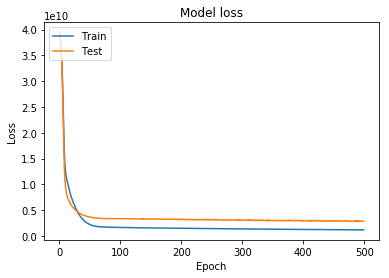

In [42]:
plt = plotHistory(history)
plt

In [49]:
NN_500E_1H = Sequential()
NN_500E_1H.add(Dense(512,input_dim = 330,activation = 'relu'))
NN_500E_1H.add(Dense(512,activation = 'relu'))
NN_500E_1H.add(Dense(1))
NN_500E_1H.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 512)               169472    
_________________________________________________________________
dense_38 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 513       
Total params: 432,641
Trainable params: 432,641
Non-trainable params: 0
_________________________________________________________________


In [50]:
newAdam = Adam(learning_rate=0.0001)
NN_500E_1H.compile(loss='mean_squared_error', optimizer=newAdam)
history = NN_500E_1H.fit(x=X,y=y,epochs=500,validation_split=0.2)

Train on 1167 samples, validate on 292 samples
Epoch 1/500
1167/1167 [==============================] - 0s 274us/step - loss: 37315028674.3582 - val_loss: 37191868359.8904
Epoch 2/500
1167/1167 [==============================] - 0s 173us/step - loss: 34670875241.7344 - val_loss: 34077835656.7671
Epoch 3/500
1167/1167 [==============================] - 0s 172us/step - loss: 30991707826.5638 - val_loss: 29510343750.1370
Epoch 4/500
1167/1167 [==============================] - 0s 181us/step - loss: 26036271552.3839 - val_loss: 23620228306.4110
Epoch 5/500
1167/1167 [==============================] - 0s 174us/step - loss: 20506454550.3753 - val_loss: 17563180817.5342
Epoch 6/500
1167/1167 [==============================] - 0s 171us/step - loss: 16197170727.9246 - val_loss: 13097517168.2192
Epoch 7/500
1167/1167 [==============================] - 0s 168us/step - loss: 13490555313.4670 - val_loss: 10542575125.0411
Epoch 8/500
1167/1167 [==============================] - 0s 167us/step - loss:

Epoch 132/500
1167/1167 [==============================] - 0s 172us/step - loss: 1499194769.6590 - val_loss: 3228848405.0411
Epoch 133/500
1167/1167 [==============================] - 0s 175us/step - loss: 1494834233.9126 - val_loss: 3203703075.0685
Epoch 134/500
1167/1167 [==============================] - 0s 173us/step - loss: 1493585565.2853 - val_loss: 3217558794.5205
Epoch 135/500
1167/1167 [==============================] - 0s 176us/step - loss: 1496104212.6204 - val_loss: 3188617789.3699
Epoch 136/500
1167/1167 [==============================] - 0s 174us/step - loss: 1494191274.8312 - val_loss: 3298419843.5068
Epoch 137/500
1167/1167 [==============================] - 0s 170us/step - loss: 1487912581.0454 - val_loss: 3203506900.1644
Epoch 138/500
1167/1167 [==============================] - 0s 172us/step - loss: 1495450916.8535 - val_loss: 3238017388.7123
Epoch 139/500
1167/1167 [==============================] - 0s 172us/step - loss: 1487215100.0514 - val_loss: 3229990629.6986


1167/1167 [==============================] - 0s 175us/step - loss: 1331742575.9040 - val_loss: 2983347953.9726
Epoch 263/500
1167/1167 [==============================] - 0s 168us/step - loss: 1322969068.1474 - val_loss: 2999233437.8082
Epoch 264/500
1167/1167 [==============================] - 0s 171us/step - loss: 1325709812.3736 - val_loss: 2948871111.8904
Epoch 265/500
1167/1167 [==============================] - 0s 169us/step - loss: 1319454295.1705 - val_loss: 3027924883.2877
Epoch 266/500
1167/1167 [==============================] - 0s 168us/step - loss: 1319151775.4790 - val_loss: 2978417109.9178
Epoch 267/500
1167/1167 [==============================] - 0s 174us/step - loss: 1316628719.1637 - val_loss: 2983793849.8630
Epoch 268/500
1167/1167 [==============================] - 0s 165us/step - loss: 1324831273.9537 - val_loss: 3020292837.6986
Epoch 269/500
1167/1167 [==============================] - 0s 172us/step - loss: 1319023766.7592 - val_loss: 2923802243.5068
Epoch 270/500


1167/1167 [==============================] - 0s 167us/step - loss: 1194996301.6555 - val_loss: 2860333389.1507
Epoch 393/500
1167/1167 [==============================] - 0s 176us/step - loss: 1187779177.9537 - val_loss: 2812116793.8630
Epoch 394/500
1167/1167 [==============================] - 0s 174us/step - loss: 1186398046.2725 - val_loss: 2826688878.4658
Epoch 395/500
1167/1167 [==============================] - 0s 175us/step - loss: 1189064424.7198 - val_loss: 2785884032.0000
Epoch 396/500
1167/1167 [==============================] - 0s 174us/step - loss: 1188443536.5621 - val_loss: 2836600046.4658
Epoch 397/500
1167/1167 [==============================] - 0s 166us/step - loss: 1185510655.2322 - val_loss: 2776230901.4795
Epoch 398/500
1167/1167 [==============================] - 0s 176us/step - loss: 1187375549.3128 - val_loss: 2809821203.2877
Epoch 399/500
1167/1167 [==============================] - 0s 175us/step - loss: 1180257150.9580 - val_loss: 2774626161.9726
Epoch 400/500


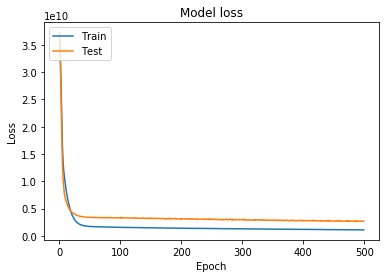

In [51]:
plt = plotHistory(history)
plt

In [29]:
NN_500E_Adam_LReLU = Sequential()
NN_500E_Adam_LReLU.add(Dense(512,input_dim = IN_DIM))
NN_500E_Adam_LReLU.add(LeakyReLU(alpha=0.1))
NN_500E_Adam_LReLU.add(Dense(512))
NN_500E_Adam_LReLU.add(LeakyReLU(alpha=0.1))
NN_500E_Adam_LReLU.add(Dense(512))
NN_500E_Adam_LReLU.add(LeakyReLU(alpha=0.1))
NN_500E_Adam_LReLU.add(Dense(1))
NN_500E_Adam_LReLU.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 512)               207872    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 512)               262656    
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 512)               262656    
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 1)                

In [30]:
NN_500E_Adam_LReLU.compile(loss='mean_squared_error', optimizer='adam')
history = NN_500E_Adam_LReLU.fit(x=X,y=y,batch_size=TRAIN_LEN,epochs=500,validation_split=0.2)

Train on 1164 samples, validate on 292 samples
Epoch 1/500
1164/1164 [==============================] - 0s 174us/step - loss: 38245584896.0000 - val_loss: 37254803456.0000
Epoch 2/500
1164/1164 [==============================] - 0s 22us/step - loss: 37333716992.0000 - val_loss: 36323143680.0000
Epoch 3/500
1164/1164 [==============================] - 0s 22us/step - loss: 36372570112.0000 - val_loss: 35196166144.0000
Epoch 4/500
1164/1164 [==============================] - 0s 22us/step - loss: 35220848640.0000 - val_loss: 33773645824.0000
Epoch 5/500
1164/1164 [==============================] - 0s 21us/step - loss: 33784530944.0000 - val_loss: 31998197760.0000
Epoch 6/500
1164/1164 [==============================] - 0s 22us/step - loss: 32020578304.0000 - val_loss: 29846003712.0000
Epoch 7/500
1164/1164 [==============================] - 0s 22us/step - loss: 29928282112.0000 - val_loss: 27285381120.0000
Epoch 8/500
1164/1164 [==============================] - 0s 21us/step - loss: 275123

Epoch 67/500
1164/1164 [==============================] - 0s 22us/step - loss: 2237722624.0000 - val_loss: 2232261888.0000
Epoch 68/500
1164/1164 [==============================] - 0s 22us/step - loss: 2209837312.0000 - val_loss: 2208127232.0000
Epoch 69/500
1164/1164 [==============================] - 0s 22us/step - loss: 2191059456.0000 - val_loss: 2190148608.0000
Epoch 70/500
1164/1164 [==============================] - 0s 24us/step - loss: 2178732032.0000 - val_loss: 2175620352.0000
Epoch 71/500
1164/1164 [==============================] - 0s 22us/step - loss: 2169381376.0000 - val_loss: 2162599680.0000
Epoch 72/500
1164/1164 [==============================] - 0s 21us/step - loss: 2161066240.0000 - val_loss: 2150736128.0000
Epoch 73/500
1164/1164 [==============================] - 0s 23us/step - loss: 2153761024.0000 - val_loss: 2140318208.0000
Epoch 74/500
1164/1164 [==============================] - 0s 21us/step - loss: 2147771392.0000 - val_loss: 2131057280.0000
Epoch 75/500
116

Epoch 134/500
1164/1164 [==============================] - 0s 21us/step - loss: 1633137408.0000 - val_loss: 1678828032.0000
Epoch 135/500
1164/1164 [==============================] - 0s 24us/step - loss: 1627756544.0000 - val_loss: 1674073472.0000
Epoch 136/500
1164/1164 [==============================] - 0s 21us/step - loss: 1622494720.0000 - val_loss: 1669742976.0000
Epoch 137/500
1164/1164 [==============================] - 0s 22us/step - loss: 1617348992.0000 - val_loss: 1665675648.0000
Epoch 138/500
1164/1164 [==============================] - 0s 21us/step - loss: 1612327168.0000 - val_loss: 1661669632.0000
Epoch 139/500
1164/1164 [==============================] - 0s 23us/step - loss: 1607428608.0000 - val_loss: 1657675648.0000
Epoch 140/500
1164/1164 [==============================] - 0s 23us/step - loss: 1602641024.0000 - val_loss: 1653738880.0000
Epoch 141/500
1164/1164 [==============================] - 0s 23us/step - loss: 1597957120.0000 - val_loss: 1650013568.0000
Epoch 14

1164/1164 [==============================] - 0s 22us/step - loss: 1472556032.0000 - val_loss: 1584004992.0000
Epoch 201/500
1164/1164 [==============================] - 0s 22us/step - loss: 1471558272.0000 - val_loss: 1583675136.0000
Epoch 202/500
1164/1164 [==============================] - 0s 21us/step - loss: 1470487296.0000 - val_loss: 1583817344.0000
Epoch 203/500
1164/1164 [==============================] - 0s 22us/step - loss: 1469393152.0000 - val_loss: 1583861248.0000
Epoch 204/500
1164/1164 [==============================] - 0s 21us/step - loss: 1468300416.0000 - val_loss: 1583636992.0000
Epoch 205/500
1164/1164 [==============================] - 0s 22us/step - loss: 1467182720.0000 - val_loss: 1583411968.0000
Epoch 206/500
1164/1164 [==============================] - 0s 22us/step - loss: 1466065792.0000 - val_loss: 1583702528.0000
Epoch 207/500
1164/1164 [==============================] - 0s 23us/step - loss: 1464896768.0000 - val_loss: 1583798016.0000
Epoch 208/500
1164/116

Epoch 267/500
1164/1164 [==============================] - 0s 21us/step - loss: 1394169344.0000 - val_loss: 1562308608.0000
Epoch 268/500
1164/1164 [==============================] - 0s 21us/step - loss: 1393084544.0000 - val_loss: 1562531968.0000
Epoch 269/500
1164/1164 [==============================] - 0s 23us/step - loss: 1391999488.0000 - val_loss: 1563497088.0000
Epoch 270/500
1164/1164 [==============================] - 0s 22us/step - loss: 1390853120.0000 - val_loss: 1563037952.0000
Epoch 271/500
1164/1164 [==============================] - 0s 22us/step - loss: 1389737600.0000 - val_loss: 1562530944.0000
Epoch 272/500
1164/1164 [==============================] - 0s 22us/step - loss: 1388702208.0000 - val_loss: 1563655552.0000
Epoch 273/500
1164/1164 [==============================] - 0s 23us/step - loss: 1387597056.0000 - val_loss: 1563518208.0000
Epoch 274/500
1164/1164 [==============================] - 0s 21us/step - loss: 1386495616.0000 - val_loss: 1562121216.0000
Epoch 27

1164/1164 [==============================] - 0s 25us/step - loss: 1322419584.0000 - val_loss: 1545335296.0000
Epoch 334/500
1164/1164 [==============================] - 0s 23us/step - loss: 1321251456.0000 - val_loss: 1544281984.0000
Epoch 335/500
1164/1164 [==============================] - 0s 22us/step - loss: 1320072448.0000 - val_loss: 1544264960.0000
Epoch 336/500
1164/1164 [==============================] - 0s 23us/step - loss: 1318896768.0000 - val_loss: 1544043136.0000
Epoch 337/500
1164/1164 [==============================] - 0s 22us/step - loss: 1317723264.0000 - val_loss: 1542234240.0000
Epoch 338/500
1164/1164 [==============================] - 0s 21us/step - loss: 1316515200.0000 - val_loss: 1542976640.0000
Epoch 339/500
1164/1164 [==============================] - 0s 22us/step - loss: 1315386112.0000 - val_loss: 1540828416.0000
Epoch 340/500
1164/1164 [==============================] - 0s 21us/step - loss: 1314219008.0000 - val_loss: 1541805184.0000
Epoch 341/500
1164/116

Epoch 400/500
1164/1164 [==============================] - 0s 23us/step - loss: 1236575104.0000 - val_loss: 1509429248.0000
Epoch 401/500
1164/1164 [==============================] - 0s 21us/step - loss: 1235035904.0000 - val_loss: 1510869760.0000
Epoch 402/500
1164/1164 [==============================] - 0s 20us/step - loss: 1233663232.0000 - val_loss: 1512005504.0000
Epoch 403/500
1164/1164 [==============================] - 0s 21us/step - loss: 1232369024.0000 - val_loss: 1507477632.0000
Epoch 404/500
1164/1164 [==============================] - 0s 23us/step - loss: 1231129600.0000 - val_loss: 1513702400.0000
Epoch 405/500
1164/1164 [==============================] - 0s 21us/step - loss: 1229905920.0000 - val_loss: 1504629632.0000
Epoch 406/500
1164/1164 [==============================] - 0s 22us/step - loss: 1228712320.0000 - val_loss: 1513926912.0000
Epoch 407/500
1164/1164 [==============================] - 0s 23us/step - loss: 1227484032.0000 - val_loss: 1502637184.0000
Epoch 40

1164/1164 [==============================] - 0s 22us/step - loss: 1152656384.0000 - val_loss: 1483358592.0000
Epoch 467/500
1164/1164 [==============================] - 0s 22us/step - loss: 1151581312.0000 - val_loss: 1472434432.0000
Epoch 468/500
1164/1164 [==============================] - 0s 22us/step - loss: 1151661824.0000 - val_loss: 1491292032.0000
Epoch 469/500
1164/1164 [==============================] - 0s 21us/step - loss: 1151585408.0000 - val_loss: 1469085824.0000
Epoch 470/500
1164/1164 [==============================] - 0s 21us/step - loss: 1151208448.0000 - val_loss: 1491826688.0000
Epoch 471/500
1164/1164 [==============================] - 0s 23us/step - loss: 1149708416.0000 - val_loss: 1469820544.0000
Epoch 472/500
1164/1164 [==============================] - 0s 21us/step - loss: 1147585280.0000 - val_loss: 1483383168.0000
Epoch 473/500
1164/1164 [==============================] - 0s 22us/step - loss: 1145080192.0000 - val_loss: 1474972800.0000
Epoch 474/500
1164/116

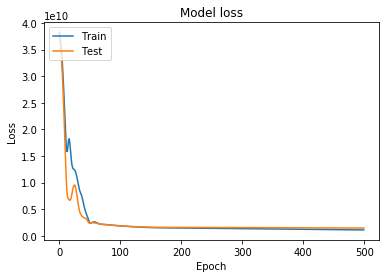

In [31]:
plt = plotHistory(history)
plt

Train on 1164 samples, validate on 292 samples
Epoch 1/1000
1164/1164 [==============================] - 0s 118us/step - loss: 384.8524 - val_loss: 4047.5051
Epoch 2/1000
1164/1164 [==============================] - 0s 22us/step - loss: 5067.0640 - val_loss: 3049.7812
Epoch 3/1000
1164/1164 [==============================] - 0s 21us/step - loss: 3833.0850 - val_loss: 932.3732
Epoch 4/1000
1164/1164 [==============================] - 0s 22us/step - loss: 1170.4578 - val_loss: 1301.4948
Epoch 5/1000
1164/1164 [==============================] - 0s 22us/step - loss: 1645.2466 - val_loss: 1648.0166
Epoch 6/1000
1164/1164 [==============================] - 0s 22us/step - loss: 2098.5935 - val_loss: 1042.1290
Epoch 7/1000
1164/1164 [==============================] - 0s 22us/step - loss: 1343.7072 - val_loss: 67.4875
Epoch 8/1000
1164/1164 [==============================] - 0s 22us/step - loss: 66.8633 - val_loss: 538.8273
Epoch 9/1000
1164/1164 [==============================] - 0s 21us/step 

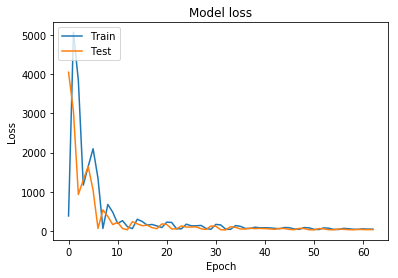

In [98]:
NN_500E_Adam_LReLU05 = Sequential()
NN_500E_Adam_LReLU05.add(Dense(512,input_dim = IN_DIM))
NN_500E_Adam_LReLU05.add(LeakyReLU(alpha=0.5))
NN_500E_Adam_LReLU05.add(Dense(512))
NN_500E_Adam_LReLU05.add(LeakyReLU(alpha=0.5))
NN_500E_Adam_LReLU05.add(Dense(512))
NN_500E_Adam_LReLU05.add(LeakyReLU(alpha=0.5))
NN_500E_Adam_LReLU05.add(Dense(1))

es = EarlyStopping(monitor='val_loss', patience = 30, mode='min', restore_best_weights=True, verbose=1)
NN_500E_Adam_LReLU05.compile(loss=root_mean_squared_error, optimizer='adam')
history = NN_500E_Adam_LReLU05.fit(x=X,y=y,batch_size=TRAIN_LEN,epochs=1000,validation_split=0.2,callbacks=[es])

plt = plotHistory(history)
plt

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 512)               207872    
_________________________________________________________________
leaky_re_lu_10 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 512)               262656    
_________________________________________________________________
leaky_re_lu_11 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 512)               262656    
_________________________________________________________________
leaky_re_lu_12 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 1)                

Epoch 60/10000
1164/1164 [==============================] - 0s 19us/step - loss: 129346.8438 - val_loss: 111901.9844
Epoch 61/10000
1164/1164 [==============================] - 0s 21us/step - loss: 128464.8906 - val_loss: 109720.8047
Epoch 62/10000
1164/1164 [==============================] - 0s 21us/step - loss: 127711.9453 - val_loss: 107632.5703
Epoch 63/10000
1164/1164 [==============================] - 0s 21us/step - loss: 127080.7422 - val_loss: 105684.1875
Epoch 64/10000
1164/1164 [==============================] - 0s 21us/step - loss: 126574.8984 - val_loss: 103872.5234
Epoch 65/10000
1164/1164 [==============================] - 0s 20us/step - loss: 126178.2422 - val_loss: 102208.4297
Epoch 66/10000
1164/1164 [==============================] - 0s 21us/step - loss: 125876.9062 - val_loss: 100699.0078
Epoch 67/10000
1164/1164 [==============================] - 0s 20us/step - loss: 125652.7422 - val_loss: 99348.4766
Epoch 68/10000
1164/1164 [==============================] - 0s 20

Epoch 131/10000
1164/1164 [==============================] - 0s 21us/step - loss: 102750.0078 - val_loss: 81517.1641
Epoch 132/10000
1164/1164 [==============================] - 0s 21us/step - loss: 102179.7188 - val_loss: 81130.0234
Epoch 133/10000
1164/1164 [==============================] - 0s 21us/step - loss: 101595.0703 - val_loss: 80731.5000
Epoch 134/10000
1164/1164 [==============================] - 0s 21us/step - loss: 101001.0000 - val_loss: 80318.6797
Epoch 135/10000
1164/1164 [==============================] - 0s 20us/step - loss: 100392.2812 - val_loss: 79894.2266
Epoch 136/10000
1164/1164 [==============================] - 0s 20us/step - loss: 99774.0234 - val_loss: 79456.4922
Epoch 137/10000
1164/1164 [==============================] - 0s 21us/step - loss: 99143.9297 - val_loss: 79004.6797
Epoch 138/10000
1164/1164 [==============================] - 0s 20us/step - loss: 98500.2188 - val_loss: 78539.0234
Epoch 139/10000
1164/1164 [==============================] - 0s 21u

Epoch 202/10000
1164/1164 [==============================] - 0s 21us/step - loss: 49471.9688 - val_loss: 49581.5352
Epoch 203/10000
1164/1164 [==============================] - 0s 20us/step - loss: 49442.8672 - val_loss: 49539.4883
Epoch 204/10000
1164/1164 [==============================] - 0s 20us/step - loss: 49397.4609 - val_loss: 49486.3477
Epoch 205/10000
1164/1164 [==============================] - 0s 20us/step - loss: 49336.6406 - val_loss: 49423.2539
Epoch 206/10000
1164/1164 [==============================] - 0s 20us/step - loss: 49262.5117 - val_loss: 49351.6133
Epoch 207/10000
1164/1164 [==============================] - 0s 21us/step - loss: 49177.4609 - val_loss: 49272.9648
Epoch 208/10000
1164/1164 [==============================] - 0s 20us/step - loss: 49084.0039 - val_loss: 49189.1211
Epoch 209/10000
1164/1164 [==============================] - 0s 20us/step - loss: 48985.3594 - val_loss: 49102.1211
Epoch 210/10000
1164/1164 [==============================] - 0s 20us/ste

Epoch 273/10000
1164/1164 [==============================] - 0s 20us/step - loss: 45414.1484 - val_loss: 45819.4883
Epoch 274/10000
1164/1164 [==============================] - 0s 20us/step - loss: 45368.4961 - val_loss: 45776.5391
Epoch 275/10000
1164/1164 [==============================] - 0s 20us/step - loss: 45322.9609 - val_loss: 45733.7383
Epoch 276/10000
1164/1164 [==============================] - 0s 20us/step - loss: 45277.4961 - val_loss: 45691.0312
Epoch 277/10000
1164/1164 [==============================] - 0s 21us/step - loss: 45232.1289 - val_loss: 45648.5312
Epoch 278/10000
1164/1164 [==============================] - 0s 19us/step - loss: 45187.0117 - val_loss: 45606.2891
Epoch 279/10000
1164/1164 [==============================] - 0s 19us/step - loss: 45142.0117 - val_loss: 45564.3711
Epoch 280/10000
1164/1164 [==============================] - 0s 19us/step - loss: 45097.1562 - val_loss: 45522.7188
Epoch 281/10000
1164/1164 [==============================] - 0s 20us/ste

Epoch 344/10000
1164/1164 [==============================] - 0s 20us/step - loss: 42535.6328 - val_loss: 43162.1562
Epoch 345/10000
1164/1164 [==============================] - 0s 19us/step - loss: 42500.9570 - val_loss: 43130.4609
Epoch 346/10000
1164/1164 [==============================] - 0s 19us/step - loss: 42466.3594 - val_loss: 43098.8867
Epoch 347/10000
1164/1164 [==============================] - 0s 22us/step - loss: 42431.9648 - val_loss: 43067.4883
Epoch 348/10000
1164/1164 [==============================] - 0s 19us/step - loss: 42397.6602 - val_loss: 43036.2461
Epoch 349/10000
1164/1164 [==============================] - 0s 21us/step - loss: 42363.6328 - val_loss: 43005.2070
Epoch 350/10000
1164/1164 [==============================] - 0s 20us/step - loss: 42329.8320 - val_loss: 42974.2891
Epoch 351/10000
1164/1164 [==============================] - 0s 21us/step - loss: 42296.0352 - val_loss: 42943.6133
Epoch 352/10000
1164/1164 [==============================] - 0s 20us/ste

Epoch 415/10000
1164/1164 [==============================] - 0s 19us/step - loss: 40548.8320 - val_loss: 41405.8711
Epoch 416/10000
1164/1164 [==============================] - 0s 20us/step - loss: 40528.1328 - val_loss: 41389.1211
Epoch 417/10000
1164/1164 [==============================] - 0s 21us/step - loss: 40507.6719 - val_loss: 41372.5820
Epoch 418/10000
1164/1164 [==============================] - 0s 18us/step - loss: 40487.4883 - val_loss: 41356.1680
Epoch 419/10000
1164/1164 [==============================] - 0s 20us/step - loss: 40467.4570 - val_loss: 41339.8633
Epoch 420/10000
1164/1164 [==============================] - 0s 19us/step - loss: 40447.5117 - val_loss: 41323.5430
Epoch 421/10000
1164/1164 [==============================] - 0s 20us/step - loss: 40427.9609 - val_loss: 41307.3711
Epoch 422/10000
1164/1164 [==============================] - 0s 21us/step - loss: 40408.4961 - val_loss: 41291.4883
Epoch 423/10000
1164/1164 [==============================] - 0s 20us/ste

Epoch 486/10000
1164/1164 [==============================] - 0s 20us/step - loss: 39539.9570 - val_loss: 40675.7852
Epoch 487/10000
1164/1164 [==============================] - 0s 20us/step - loss: 39531.1875 - val_loss: 40670.8867
Epoch 488/10000
1164/1164 [==============================] - 0s 19us/step - loss: 39522.6797 - val_loss: 40666.1680
Epoch 489/10000
1164/1164 [==============================] - 0s 19us/step - loss: 39514.3516 - val_loss: 40661.6367
Epoch 490/10000
1164/1164 [==============================] - 0s 20us/step - loss: 39506.0039 - val_loss: 40657.3398
Epoch 491/10000
1164/1164 [==============================] - 0s 20us/step - loss: 39497.8633 - val_loss: 40652.9883
Epoch 492/10000
1164/1164 [==============================] - 0s 20us/step - loss: 39489.8203 - val_loss: 40648.5820
Epoch 493/10000
1164/1164 [==============================] - 0s 21us/step - loss: 39481.8281 - val_loss: 40644.3789
Epoch 494/10000
1164/1164 [==============================] - 0s 20us/ste

Epoch 557/10000
1164/1164 [==============================] - 0s 21us/step - loss: 39126.1836 - val_loss: 40500.9961
Epoch 558/10000
1164/1164 [==============================] - 0s 19us/step - loss: 39122.1719 - val_loss: 40499.7930
Epoch 559/10000
1164/1164 [==============================] - 0s 20us/step - loss: 39118.1484 - val_loss: 40498.6680
Epoch 560/10000
1164/1164 [==============================] - 0s 21us/step - loss: 39114.3477 - val_loss: 40497.7383
Epoch 561/10000
1164/1164 [==============================] - 0s 21us/step - loss: 39110.5469 - val_loss: 40496.0820
Epoch 562/10000
1164/1164 [==============================] - 0s 21us/step - loss: 39106.9883 - val_loss: 40494.4648
Epoch 563/10000
1164/1164 [==============================] - 0s 21us/step - loss: 39103.3555 - val_loss: 40493.7617
Epoch 564/10000
1164/1164 [==============================] - 0s 20us/step - loss: 39099.8242 - val_loss: 40493.5430
Epoch 565/10000
1164/1164 [==============================] - 0s 20us/ste

Epoch 628/10000
1164/1164 [==============================] - 0s 22us/step - loss: 38912.4883 - val_loss: 40443.1367
Epoch 629/10000
1164/1164 [==============================] - 0s 21us/step - loss: 38909.9883 - val_loss: 40442.8320
Epoch 630/10000
1164/1164 [==============================] - 0s 21us/step - loss: 38907.5000 - val_loss: 40442.5430
Epoch 631/10000
1164/1164 [==============================] - 0s 21us/step - loss: 38905.0391 - val_loss: 40441.6367
Epoch 632/10000
1164/1164 [==============================] - 0s 21us/step - loss: 38902.6445 - val_loss: 40441.0352
Epoch 633/10000
1164/1164 [==============================] - 0s 22us/step - loss: 38900.1836 - val_loss: 40440.6680
Epoch 634/10000
1164/1164 [==============================] - 0s 19us/step - loss: 38897.8477 - val_loss: 40440.6211
Epoch 635/10000
1164/1164 [==============================] - 0s 20us/step - loss: 38895.4609 - val_loss: 40439.9883
Epoch 636/10000
1164/1164 [==============================] - 0s 21us/ste

Epoch 699/10000
1164/1164 [==============================] - 0s 21us/step - loss: 38756.8125 - val_loss: 40389.8320
Epoch 700/10000
1164/1164 [==============================] - 0s 20us/step - loss: 38754.6758 - val_loss: 40388.7383
Epoch 701/10000
1164/1164 [==============================] - 0s 21us/step - loss: 38752.6445 - val_loss: 40387.8320
Epoch 702/10000
1164/1164 [==============================] - 0s 20us/step - loss: 38750.5391 - val_loss: 40387.1680
Epoch 703/10000
1164/1164 [==============================] - 0s 20us/step - loss: 38748.4961 - val_loss: 40386.1680
Epoch 704/10000
1164/1164 [==============================] - 0s 21us/step - loss: 38746.4609 - val_loss: 40385.1211
Epoch 705/10000
1164/1164 [==============================] - 0s 21us/step - loss: 38744.3477 - val_loss: 40384.1289
Epoch 706/10000
1164/1164 [==============================] - 0s 21us/step - loss: 38742.1875 - val_loss: 40383.1211
Epoch 707/10000
1164/1164 [==============================] - 0s 20us/ste

Epoch 770/10000
1164/1164 [==============================] - 0s 21us/step - loss: 38614.9609 - val_loss: 40330.0898
Epoch 771/10000
1164/1164 [==============================] - 0s 21us/step - loss: 38613.0391 - val_loss: 40329.6211
Epoch 772/10000
1164/1164 [==============================] - 0s 20us/step - loss: 38611.1758 - val_loss: 40329.0352
Epoch 773/10000
1164/1164 [==============================] - 0s 21us/step - loss: 38609.3555 - val_loss: 40328.0898
Epoch 774/10000
1164/1164 [==============================] - 0s 21us/step - loss: 38607.5039 - val_loss: 40326.9570
Epoch 775/10000
1164/1164 [==============================] - 0s 21us/step - loss: 38605.6523 - val_loss: 40326.1719
Epoch 776/10000
1164/1164 [==============================] - 0s 20us/step - loss: 38603.8516 - val_loss: 40325.8711
Epoch 777/10000
1164/1164 [==============================] - 0s 22us/step - loss: 38601.9961 - val_loss: 40325.5117
Epoch 778/10000
1164/1164 [==============================] - 0s 20us/ste

Epoch 841/10000
1164/1164 [==============================] - 0s 22us/step - loss: 38476.8477 - val_loss: 40292.2539
Epoch 842/10000
1164/1164 [==============================] - 0s 19us/step - loss: 38475.0469 - val_loss: 40291.7070
Epoch 843/10000
1164/1164 [==============================] - 0s 21us/step - loss: 38473.4492 - val_loss: 40290.2070
Epoch 844/10000
1164/1164 [==============================] - 0s 21us/step - loss: 38471.6445 - val_loss: 40289.5117
Epoch 845/10000
1164/1164 [==============================] - 0s 21us/step - loss: 38469.9609 - val_loss: 40290.2070
Epoch 846/10000
1164/1164 [==============================] - 0s 21us/step - loss: 38468.1523 - val_loss: 40290.0117
Epoch 847/10000
1164/1164 [==============================] - 0s 21us/step - loss: 38466.4609 - val_loss: 40288.7461
Epoch 848/10000
1164/1164 [==============================] - 0s 20us/step - loss: 38464.6523 - val_loss: 40287.4141
Epoch 849/10000
1164/1164 [==============================] - 0s 20us/ste

Epoch 912/10000
1164/1164 [==============================] - 0s 20us/step - loss: 38356.8477 - val_loss: 40243.1289
Epoch 913/10000
1164/1164 [==============================] - 0s 20us/step - loss: 38355.1445 - val_loss: 40242.1211
Epoch 914/10000
1164/1164 [==============================] - 0s 20us/step - loss: 38353.5156 - val_loss: 40241.2930
Epoch 915/10000
1164/1164 [==============================] - 0s 21us/step - loss: 38351.9844 - val_loss: 40241.1680
Epoch 916/10000
1164/1164 [==============================] - 0s 21us/step - loss: 38350.3477 - val_loss: 40240.7617
Epoch 917/10000
1164/1164 [==============================] - 0s 21us/step - loss: 38348.6758 - val_loss: 40239.0898
Epoch 918/10000
1164/1164 [==============================] - 0s 21us/step - loss: 38347.0391 - val_loss: 40237.4570
Epoch 919/10000
1164/1164 [==============================] - 0s 22us/step - loss: 38345.4844 - val_loss: 40237.1602
Epoch 920/10000
1164/1164 [==============================] - 0s 22us/ste

Epoch 983/10000
1164/1164 [==============================] - 0s 20us/step - loss: 38243.1875 - val_loss: 40199.8320
Epoch 984/10000
1164/1164 [==============================] - 0s 21us/step - loss: 38241.6758 - val_loss: 40200.0039
Epoch 985/10000
1164/1164 [==============================] - 0s 21us/step - loss: 38240.1523 - val_loss: 40199.7070
Epoch 986/10000
1164/1164 [==============================] - 0s 21us/step - loss: 38238.6445 - val_loss: 40198.4961
Epoch 987/10000
1164/1164 [==============================] - 0s 20us/step - loss: 38237.0469 - val_loss: 40197.7930
Epoch 988/10000
1164/1164 [==============================] - 0s 21us/step - loss: 38235.5391 - val_loss: 40197.9883
Epoch 989/10000
1164/1164 [==============================] - 0s 20us/step - loss: 38234.0117 - val_loss: 40197.4570
Epoch 990/10000
1164/1164 [==============================] - 0s 19us/step - loss: 38232.5039 - val_loss: 40196.4531
Epoch 991/10000
1164/1164 [==============================] - 0s 20us/ste

Epoch 1054/10000
1164/1164 [==============================] - 0s 21us/step - loss: 38131.6875 - val_loss: 40161.2148
Epoch 1055/10000
1164/1164 [==============================] - 0s 20us/step - loss: 38130.3125 - val_loss: 40160.8789
Epoch 1056/10000
1164/1164 [==============================] - 0s 21us/step - loss: 38128.8203 - val_loss: 40160.6133
Epoch 1057/10000
1164/1164 [==============================] - 0s 21us/step - loss: 38127.3203 - val_loss: 40159.9883
Epoch 1058/10000
1164/1164 [==============================] - 0s 21us/step - loss: 38125.8203 - val_loss: 40159.4219
Epoch 1059/10000
1164/1164 [==============================] - 0s 21us/step - loss: 38124.3203 - val_loss: 40159.0430
Epoch 1060/10000
1164/1164 [==============================] - 0s 20us/step - loss: 38122.8203 - val_loss: 40159.2461
Epoch 1061/10000
1164/1164 [==============================] - 0s 23us/step - loss: 38121.3125 - val_loss: 40158.5117
Epoch 1062/10000
1164/1164 [==============================] - 0s

1164/1164 [==============================] - 0s 20us/step - loss: 38026.9844 - val_loss: 40131.4648
Epoch 1125/10000
1164/1164 [==============================] - 0s 20us/step - loss: 38025.4961 - val_loss: 40131.3906
Epoch 1126/10000
1164/1164 [==============================] - 0s 22us/step - loss: 38023.9961 - val_loss: 40130.1211
Epoch 1127/10000
1164/1164 [==============================] - 0s 20us/step - loss: 38022.5039 - val_loss: 40129.9883
Epoch 1128/10000
1164/1164 [==============================] - 0s 21us/step - loss: 38021.0039 - val_loss: 40129.3867
Epoch 1129/10000
1164/1164 [==============================] - 0s 21us/step - loss: 38019.5117 - val_loss: 40128.0039
Epoch 1130/10000
1164/1164 [==============================] - 0s 20us/step - loss: 38018.0391 - val_loss: 40128.4883
Epoch 1131/10000
1164/1164 [==============================] - 0s 20us/step - loss: 38016.5469 - val_loss: 40128.6211
Epoch 1132/10000
1164/1164 [==============================] - 0s 20us/step - loss

Epoch 1195/10000
1164/1164 [==============================] - 0s 21us/step - loss: 37919.9570 - val_loss: 40094.9961
Epoch 1196/10000
1164/1164 [==============================] - 0s 20us/step - loss: 37918.3477 - val_loss: 40094.9648
Epoch 1197/10000
1164/1164 [==============================] - 0s 20us/step - loss: 37916.8125 - val_loss: 40095.8906
Epoch 1198/10000
1164/1164 [==============================] - 0s 20us/step - loss: 37915.1797 - val_loss: 40094.2070
Epoch 1199/10000
1164/1164 [==============================] - 0s 22us/step - loss: 37913.6445 - val_loss: 40093.1289
Epoch 1200/10000
1164/1164 [==============================] - 0s 20us/step - loss: 37912.0391 - val_loss: 40092.9570
Epoch 1201/10000
1164/1164 [==============================] - 0s 22us/step - loss: 37910.4961 - val_loss: 40091.4570
Epoch 1202/10000
1164/1164 [==============================] - 0s 21us/step - loss: 37908.9609 - val_loss: 40090.4961
Epoch 1203/10000
1164/1164 [==============================] - 0s

1164/1164 [==============================] - 0s 22us/step - loss: 37799.5000 - val_loss: 40053.6211
Epoch 1266/10000
1164/1164 [==============================] - 0s 20us/step - loss: 37797.8125 - val_loss: 40051.4219
Epoch 1267/10000
1164/1164 [==============================] - 0s 19us/step - loss: 37796.0156 - val_loss: 40051.3867
Epoch 1268/10000
1164/1164 [==============================] - 0s 20us/step - loss: 37794.3203 - val_loss: 40050.8320
Epoch 1269/10000
1164/1164 [==============================] - 0s 21us/step - loss: 37792.5039 - val_loss: 40049.6680
Epoch 1270/10000
1164/1164 [==============================] - 0s 20us/step - loss: 37790.8125 - val_loss: 40049.5000
Epoch 1271/10000
1164/1164 [==============================] - 0s 21us/step - loss: 37788.9883 - val_loss: 40048.3789
Epoch 1272/10000
1164/1164 [==============================] - 0s 19us/step - loss: 37787.1562 - val_loss: 40048.3711
Epoch 1273/10000
1164/1164 [==============================] - 0s 20us/step - loss

Epoch 1336/10000
1164/1164 [==============================] - 0s 21us/step - loss: 37675.0430 - val_loss: 40013.6680
Epoch 1337/10000
1164/1164 [==============================] - 0s 21us/step - loss: 37673.1875 - val_loss: 40012.5352
Epoch 1338/10000
1164/1164 [==============================] - 0s 20us/step - loss: 37671.4531 - val_loss: 40013.0430
Epoch 1339/10000
1164/1164 [==============================] - 0s 20us/step - loss: 37669.5156 - val_loss: 40010.6719
Epoch 1340/10000
1164/1164 [==============================] - 0s 20us/step - loss: 37667.6836 - val_loss: 40008.9648
Epoch 1341/10000
1164/1164 [==============================] - 0s 21us/step - loss: 37665.9609 - val_loss: 40010.0000
Epoch 1342/10000
1164/1164 [==============================] - 0s 21us/step - loss: 37664.1445 - val_loss: 40007.8359
Epoch 1343/10000
1164/1164 [==============================] - 0s 20us/step - loss: 37662.3203 - val_loss: 40006.9219
Epoch 1344/10000
1164/1164 [==============================] - 0s

1164/1164 [==============================] - 0s 21us/step - loss: 37531.8438 - val_loss: 39967.6289
Epoch 1407/10000
1164/1164 [==============================] - 0s 22us/step - loss: 37529.6562 - val_loss: 39967.1211
Epoch 1408/10000
1164/1164 [==============================] - 0s 20us/step - loss: 37527.4961 - val_loss: 39966.9180
Epoch 1409/10000
1164/1164 [==============================] - 0s 19us/step - loss: 37525.3203 - val_loss: 39964.5430
Epoch 1410/10000
1164/1164 [==============================] - 0s 20us/step - loss: 37523.0430 - val_loss: 39964.8789
Epoch 1411/10000
1164/1164 [==============================] - 0s 19us/step - loss: 37520.8516 - val_loss: 39963.2070
Epoch 1412/10000
1164/1164 [==============================] - 0s 20us/step - loss: 37518.6484 - val_loss: 39962.1641
Epoch 1413/10000
1164/1164 [==============================] - 0s 21us/step - loss: 37516.4609 - val_loss: 39961.4219
Epoch 1414/10000
1164/1164 [==============================] - 0s 20us/step - loss

Epoch 1477/10000
1164/1164 [==============================] - 0s 21us/step - loss: 37370.3086 - val_loss: 39900.5859
Epoch 1478/10000
1164/1164 [==============================] - 0s 20us/step - loss: 37367.9570 - val_loss: 39900.3633
Epoch 1479/10000
1164/1164 [==============================] - 0s 21us/step - loss: 37365.5039 - val_loss: 39899.9570
Epoch 1480/10000
1164/1164 [==============================] - 0s 21us/step - loss: 37363.0469 - val_loss: 39898.4961
Epoch 1481/10000
1164/1164 [==============================] - 0s 20us/step - loss: 37360.6836 - val_loss: 39899.0117
Epoch 1482/10000
1164/1164 [==============================] - 0s 21us/step - loss: 37358.3086 - val_loss: 39897.0781
Epoch 1483/10000
1164/1164 [==============================] - 0s 21us/step - loss: 37355.9531 - val_loss: 39895.4883
Epoch 1484/10000
1164/1164 [==============================] - 0s 20us/step - loss: 37353.5039 - val_loss: 39895.2617
Epoch 1485/10000
1164/1164 [==============================] - 0s

1164/1164 [==============================] - 0s 20us/step - loss: 37197.9883 - val_loss: 39836.2539
Epoch 1548/10000
1164/1164 [==============================] - 0s 20us/step - loss: 37195.3398 - val_loss: 39834.8867
Epoch 1549/10000
1164/1164 [==============================] - 0s 21us/step - loss: 37192.6562 - val_loss: 39835.3320
Epoch 1550/10000
1164/1164 [==============================] - 0s 20us/step - loss: 37190.0117 - val_loss: 39830.8320
Epoch 1551/10000
1164/1164 [==============================] - 0s 22us/step - loss: 37187.4492 - val_loss: 39832.3906
Epoch 1552/10000
1164/1164 [==============================] - 0s 18us/step - loss: 37184.6914 - val_loss: 39827.9648
Epoch 1553/10000
1164/1164 [==============================] - 0s 20us/step - loss: 37182.0430 - val_loss: 39828.5469
Epoch 1554/10000
1164/1164 [==============================] - 0s 20us/step - loss: 37179.4961 - val_loss: 39827.1367
Epoch 1555/10000
1164/1164 [==============================] - 0s 19us/step - loss

Epoch 1618/10000
1164/1164 [==============================] - 0s 20us/step - loss: 36995.9570 - val_loss: 39757.6250
Epoch 1619/10000
1164/1164 [==============================] - 0s 22us/step - loss: 36992.6953 - val_loss: 39762.3867
Epoch 1620/10000
1164/1164 [==============================] - 0s 19us/step - loss: 36989.5156 - val_loss: 39759.6133
Epoch 1621/10000
1164/1164 [==============================] - 0s 20us/step - loss: 36986.3477 - val_loss: 39755.8594
Epoch 1622/10000
1164/1164 [==============================] - 0s 19us/step - loss: 36983.1523 - val_loss: 39759.7656
Epoch 1623/10000
1164/1164 [==============================] - 0s 20us/step - loss: 36979.9844 - val_loss: 39750.0430
Epoch 1624/10000
1164/1164 [==============================] - 0s 20us/step - loss: 36976.6875 - val_loss: 39762.0898
Epoch 1625/10000
1164/1164 [==============================] - 0s 21us/step - loss: 36973.5039 - val_loss: 39742.8711
Epoch 1626/10000
1164/1164 [==============================] - 0s

1164/1164 [==============================] - 0s 20us/step - loss: 36773.4492 - val_loss: 39700.6680
Epoch 1689/10000
1164/1164 [==============================] - 0s 20us/step - loss: 36770.3125 - val_loss: 39660.6719
Epoch 1690/10000
1164/1164 [==============================] - 0s 20us/step - loss: 36766.9531 - val_loss: 39690.1211
Epoch 1691/10000
1164/1164 [==============================] - 0s 20us/step - loss: 36763.3125 - val_loss: 39670.3711
Epoch 1692/10000
1164/1164 [==============================] - 0s 19us/step - loss: 36759.8125 - val_loss: 39675.0781
Epoch 1693/10000
1164/1164 [==============================] - 0s 21us/step - loss: 36756.4961 - val_loss: 39677.1211
Epoch 1694/10000
1164/1164 [==============================] - 0s 21us/step - loss: 36753.3047 - val_loss: 39660.2617
Epoch 1695/10000
1164/1164 [==============================] - 0s 20us/step - loss: 36750.1562 - val_loss: 39682.9883
Epoch 1696/10000
1164/1164 [==============================] - 0s 20us/step - loss

Epoch 1759/10000
1164/1164 [==============================] - 0s 20us/step - loss: 36528.5508 - val_loss: 39601.6094
Epoch 1760/10000
1164/1164 [==============================] - 0s 21us/step - loss: 36525.4883 - val_loss: 39566.1133
Epoch 1761/10000
1164/1164 [==============================] - 0s 22us/step - loss: 36522.5430 - val_loss: 39614.6211
Epoch 1762/10000
1164/1164 [==============================] - 0s 20us/step - loss: 36519.5508 - val_loss: 39557.5469
Epoch 1763/10000
1164/1164 [==============================] - 0s 20us/step - loss: 36516.3516 - val_loss: 39613.8711
Epoch 1764/10000
1164/1164 [==============================] - 0s 19us/step - loss: 36512.6992 - val_loss: 39559.8398
Epoch 1765/10000
1164/1164 [==============================] - 0s 21us/step - loss: 36508.6992 - val_loss: 39596.6133
Epoch 1766/10000
1164/1164 [==============================] - 0s 20us/step - loss: 36504.5508 - val_loss: 39573.5352
Epoch 1767/10000
1164/1164 [==============================] - 0s

1164/1164 [==============================] - 0s 20us/step - loss: 36272.1875 - val_loss: 39488.0391
Epoch 1830/10000
1164/1164 [==============================] - 0s 20us/step - loss: 36268.1602 - val_loss: 39497.5039
Epoch 1831/10000
1164/1164 [==============================] - 0s 20us/step - loss: 36264.4844 - val_loss: 39471.0117
Epoch 1832/10000
1164/1164 [==============================] - 0s 21us/step - loss: 36260.9531 - val_loss: 39508.3320
Epoch 1833/10000
1164/1164 [==============================] - 0s 20us/step - loss: 36257.3477 - val_loss: 39460.1289
Epoch 1834/10000
1164/1164 [==============================] - 0s 20us/step - loss: 36253.8398 - val_loss: 39513.4961
Epoch 1835/10000
1164/1164 [==============================] - 0s 20us/step - loss: 36250.1953 - val_loss: 39453.2617
Epoch 1836/10000
1164/1164 [==============================] - 0s 21us/step - loss: 36246.3477 - val_loss: 39508.3906
Epoch 1837/10000
1164/1164 [==============================] - 0s 20us/step - loss

Epoch 1900/10000
1164/1164 [==============================] - 0s 19us/step - loss: 35981.4961 - val_loss: 39347.1602
Epoch 1901/10000
1164/1164 [==============================] - 0s 20us/step - loss: 35976.3008 - val_loss: 39431.8906
Epoch 1902/10000
1164/1164 [==============================] - 0s 19us/step - loss: 35970.0469 - val_loss: 39369.2461
Epoch 1903/10000
1164/1164 [==============================] - 0s 21us/step - loss: 35963.8477 - val_loss: 39396.7070
Epoch 1904/10000
1164/1164 [==============================] - 0s 20us/step - loss: 35958.4961 - val_loss: 39400.9883
Epoch 1905/10000
1164/1164 [==============================] - 0s 20us/step - loss: 35954.1992 - val_loss: 39365.5469
Epoch 1906/10000
1164/1164 [==============================] - 0s 19us/step - loss: 35950.9531 - val_loss: 39424.6719
Epoch 1907/10000
1164/1164 [==============================] - 0s 21us/step - loss: 35947.9531 - val_loss: 39344.6094
Epoch 1908/10000
1164/1164 [==============================] - 0s

1164/1164 [==============================] - 0s 20us/step - loss: 35659.6914 - val_loss: 39254.5898
Epoch 1971/10000
1164/1164 [==============================] - 0s 21us/step - loss: 35655.8086 - val_loss: 39354.9648
Epoch 1972/10000
1164/1164 [==============================] - 0s 20us/step - loss: 35651.1641 - val_loss: 39252.6133
Epoch 1973/10000
1164/1164 [==============================] - 0s 19us/step - loss: 35646.0156 - val_loss: 39348.2070
Epoch 1974/10000
1164/1164 [==============================] - 0s 21us/step - loss: 35640.1992 - val_loss: 39262.2969
Epoch 1975/10000
1164/1164 [==============================] - 0s 20us/step - loss: 35634.0469 - val_loss: 39326.5430
Epoch 1976/10000
1164/1164 [==============================] - 0s 20us/step - loss: 35627.6992 - val_loss: 39281.7031
Epoch 1977/10000
1164/1164 [==============================] - 0s 20us/step - loss: 35621.8008 - val_loss: 39296.5117
Epoch 1978/10000
1164/1164 [==============================] - 0s 20us/step - loss

Epoch 2041/10000
1164/1164 [==============================] - 0s 20us/step - loss: 35288.0156 - val_loss: 39203.2070
Epoch 2042/10000
1164/1164 [==============================] - 0s 21us/step - loss: 35282.4883 - val_loss: 39182.4219
Epoch 2043/10000
1164/1164 [==============================] - 0s 19us/step - loss: 35277.3008 - val_loss: 39219.3633
Epoch 2044/10000
1164/1164 [==============================] - 0s 21us/step - loss: 35272.4492 - val_loss: 39161.8359
Epoch 2045/10000
1164/1164 [==============================] - 0s 21us/step - loss: 35267.8086 - val_loss: 39233.3867
Epoch 2046/10000
1164/1164 [==============================] - 0s 19us/step - loss: 35263.2969 - val_loss: 39144.3711
Epoch 2047/10000
1164/1164 [==============================] - 0s 21us/step - loss: 35259.0117 - val_loss: 39246.8711
Epoch 2048/10000
1164/1164 [==============================] - 0s 20us/step - loss: 35254.8086 - val_loss: 39128.7891
Epoch 2049/10000
1164/1164 [==============================] - 0s

1164/1164 [==============================] - 0s 21us/step - loss: 34889.6562 - val_loss: 39063.2031
Epoch 2112/10000
1164/1164 [==============================] - 0s 21us/step - loss: 34885.3281 - val_loss: 39146.7070
Epoch 2113/10000
1164/1164 [==============================] - 0s 21us/step - loss: 34881.0156 - val_loss: 39043.9531
Epoch 2114/10000
1164/1164 [==============================] - 0s 20us/step - loss: 34876.4961 - val_loss: 39154.9531
Epoch 2115/10000
1164/1164 [==============================] - 0s 20us/step - loss: 34871.0430 - val_loss: 39037.9570
Epoch 2116/10000
1164/1164 [==============================] - 0s 19us/step - loss: 34865.1562 - val_loss: 39148.7070
Epoch 2117/10000
1164/1164 [==============================] - 0s 21us/step - loss: 34858.4570 - val_loss: 39043.0898
Epoch 2118/10000
1164/1164 [==============================] - 0s 21us/step - loss: 34851.3398 - val_loss: 39130.9570
Epoch 2119/10000
1164/1164 [==============================] - 0s 21us/step - loss

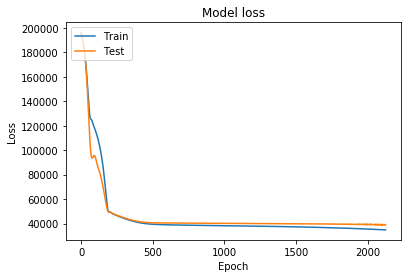

In [50]:
NN_500E_Adam31_LReLU05 = Sequential()
NN_500E_Adam31_LReLU05.add(Dense(512,input_dim = IN_DIM))
NN_500E_Adam31_LReLU05.add(LeakyReLU(alpha=0.5))
NN_500E_Adam31_LReLU05.add(Dense(512))
NN_500E_Adam31_LReLU05.add(LeakyReLU(alpha=0.5))
NN_500E_Adam31_LReLU05.add(Dense(512))
NN_500E_Adam31_LReLU05.add(LeakyReLU(alpha=0.5))
NN_500E_Adam31_LReLU05.add(Dense(1))
NN_500E_Adam31_LReLU05.summary()
newAdam = Adam(learning_rate=0.0001)
es = EarlyStopping(monitor='val_loss', patience = 30, mode='min', restore_best_weights=True, verbose=1)
NN_500E_Adam31_LReLU05.compile(loss=root_mean_squared_error, optimizer=newAdam)
history = NN_500E_Adam31_LReLU05.fit(x=X,y=y,batch_size=TRAIN_LEN,epochs=10000,validation_split=0.2,callbacks=[es])

plt = plotHistory(history)
plt

In [45]:
es = EarlyStopping(monitor='val_loss', patience = 50, mode='min', restore_best_weights=True, verbose=1)
newAdam = Adam(learning_rate=0.01)
Final_Model.compile(loss=root_mean_squared_error, optimizer=newAdam)
history = Final_Model.fit(x=X,y=y,batch_size=TRAIN_LEN,epochs=10000,validation_split=0.2,callbacks=[es])

Train on 1164 samples, validate on 292 samples
Epoch 1/10000
1164/1164 [==============================] - 0s 119us/step - loss: 37912.3438 - val_loss: 593062.6250
Epoch 2/10000
1164/1164 [==============================] - 0s 20us/step - loss: 648152.7500 - val_loss: 162182.1719
Epoch 3/10000
1164/1164 [==============================] - 0s 19us/step - loss: 168702.1406 - val_loss: 510281.0938
Epoch 4/10000
1164/1164 [==============================] - 0s 21us/step - loss: 747746.4375 - val_loss: 225169.9688
Epoch 5/10000
1164/1164 [==============================] - 0s 20us/step - loss: 277342.7500 - val_loss: 293966.9688
Epoch 6/10000
1164/1164 [==============================] - 0s 21us/step - loss: 295642.8125 - val_loss: 110410.0625
Epoch 7/10000
1164/1164 [==============================] - 0s 19us/step - loss: 115579.7500 - val_loss: 148515.7031
Epoch 8/10000
1164/1164 [==============================] - 0s 21us/step - loss: 196979.5469 - val_loss: 155714.0469
Epoch 9/10000
1164/1164 [

Epoch 72/10000
1164/1164 [==============================] - 0s 20us/step - loss: 38171.6445 - val_loss: 39883.4570
Epoch 73/10000
1164/1164 [==============================] - 0s 20us/step - loss: 37638.8125 - val_loss: 40671.2031
Epoch 74/10000
1164/1164 [==============================] - 0s 20us/step - loss: 38007.4609 - val_loss: 40051.1719
Epoch 75/10000
1164/1164 [==============================] - 0s 18us/step - loss: 37587.0000 - val_loss: 39833.1211
Epoch 76/10000
1164/1164 [==============================] - 0s 19us/step - loss: 37854.0430 - val_loss: 39850.4648
Epoch 77/10000
1164/1164 [==============================] - 0s 21us/step - loss: 37529.6445 - val_loss: 40431.3867
Epoch 78/10000
1164/1164 [==============================] - 0s 20us/step - loss: 37722.4961 - val_loss: 40066.2461
Epoch 79/10000
1164/1164 [==============================] - 0s 20us/step - loss: 37473.3086 - val_loss: 39821.7383
Epoch 80/10000
1164/1164 [==============================] - 0s 19us/step - loss:

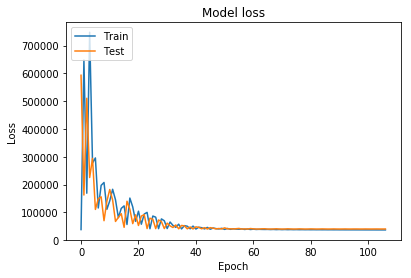

In [46]:
plt = plotHistory(history)
plt

In [51]:
y_df = pd.DataFrame(pred(NN_500E_Adam31_LReLU05))
y_df = y_df.rename(columns={0:'SalePrice'})
out = Id.copy()
out = out.join(y_df)
out

,Id,SalePrice
0,1461,119825.898438
1,1462,230804.328125
2,1463,199695.843750
3,1464,192461.093750
4,1465,172301.296875
...,...,...
1454,2915,90912.945312
1455,2916,98049.890625
1456,2917,198322.968750
1457,2918,112107.187500


In [52]:
out.to_csv(r'~/Datas/KaggleHouse/NN_500E_Adam31_LReLU05.csv',index = False)